In [48]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gp
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

tweets = pd.read_csv("train.csv")
tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [49]:
geolocator = Nominatim(user_agent="orga_datos")
def getGeoData(x):
    l = geolocator.geocode(x, timeout=20)
    if l == None:
        return (None, None, None)
    return (l.address, l.latitude, l.longitude)

tweets["address_latitude_longitude"] = tweets.location.transform(lambda x: getGeoData(x))
tweets.head()

,id,keyword,location,text,target,address_latitude_longitude
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"(Nanno, Comunità della Val di Non, Provincia d..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"(Nanno, Comunità della Val di Non, Provincia d..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"(Nanno, Comunità della Val di Non, Provincia d..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"(Nanno, Comunità della Val di Non, Provincia d..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"(Nanno, Comunità della Val di Non, Provincia d..."


In [58]:
tweets["latitude"] = tweets.address_latitude_longitude.transform(lambda x: x[1])
tweets["longitude"] = tweets.address_latitude_longitude.transform(lambda x: x[2])

In [59]:
def getCleanLocation(x):
    if x[0] == None and x[1] == None and x[2] == None:
        return (None, None)
    
    splittedAddress = x[0].split(",")
    
    if 0 <= len(splittedAddress) <= 1:
        return (None, None)
    
    return (splittedAddress[0], splittedAddress[-1])
    
tweets["city"] = ""
tweets["country"] = ""

for index, row in tweets.iterrows():
    cleanLocation = getCleanLocation(row.address_latitude_longitude)
    tweets.at[index,"city"], tweets.at[index,"country"] = cleanLocation[0], cleanLocation[1]
    
tweets.to_csv("tweets_with_clean_location")

In [60]:
clean = pd.read_csv("tweets_with_clean_location")
clean

,Unnamed: 0,id,keyword,location,text,target,address_latitude_longitude,city,country,latitude,longitude
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
...,...,...,...,...,...,...,...,...,...,...,...
7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029


<IPython.core.display.Javascript object>


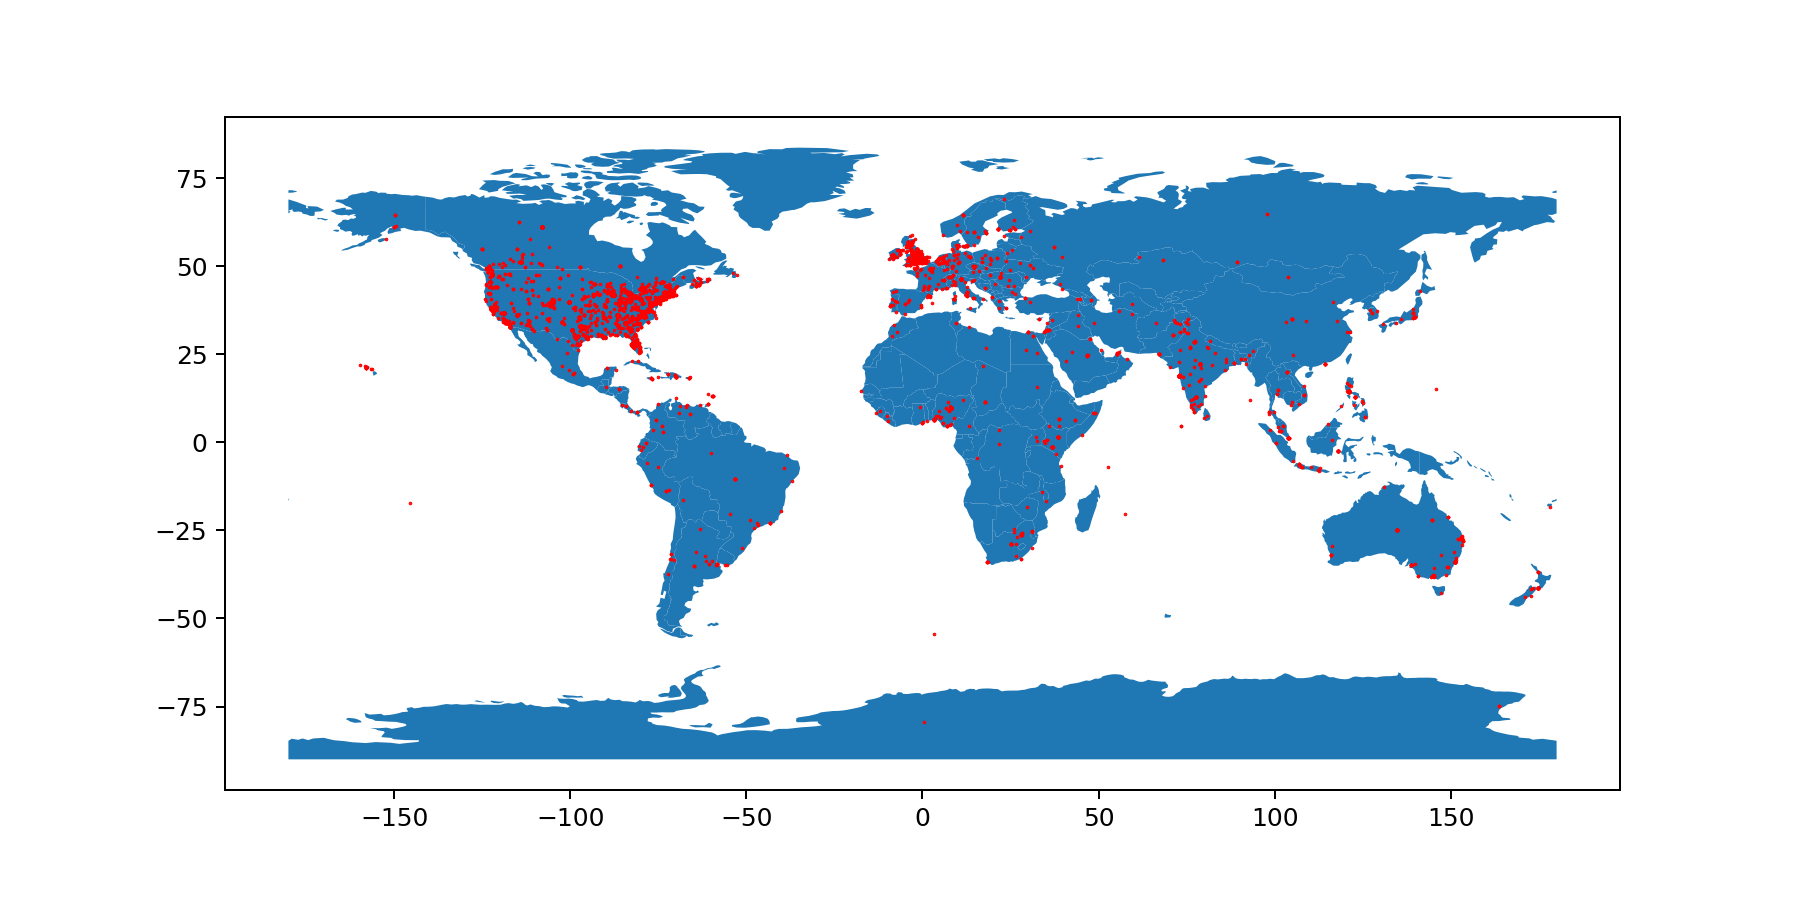

In [61]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

gdf = gp.GeoDataFrame(
    clean, geometry=gp.points_from_xy(clean.longitude, clean.latitude))
ax = gdf.plot(color="red", figsize=(10, 5), zorder=2, markersize=0.2)

world.plot(ax = ax, figsize=(10, 5), zorder=1)